# Step 1: Data Import and Inspection

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the McDonald's dataset
df = pd.read_csv('mcdonalds.csv')

In [3]:
# Display the first few rows of the dataset
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [4]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [5]:
# Display summary statistics
df.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


# Step 2: Data Cleaning

In [6]:
# Check for missing values
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [7]:
# Remove duplicates if any
df = df.drop_duplicates()

In [8]:
df['Like']

0                 -3
1                 +2
2                 +1
3                 +4
4                 +2
            ...     
1448    I hate it!-5
1449              +2
1450              +3
1451              +4
1452              -3
Name: Like, Length: 1431, dtype: object

In [9]:
# Convert "Yes"/"No" columns to 0/1
df = df.replace({'Yes': 1, 'No': 0})

# Define mapping for text ratings
rating_map = {
    'I hate it!': -5,
    'I love it!': 5,
    '-3': -3,
    '-4': -4,
    '-2': -2,
    '-1': -1,
    '0': 0,
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4
}

# Replace the text ratings with numeric values in the existing columns
df = df.replace(rating_map, regex=True)

In [10]:
# Verify conversion
df.head(20)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,2,49,Once a month,Male
5,1,1,0,1,0,1,1,1,0,0,0,2,55,Every three months,Male
6,1,1,1,1,0,1,0,1,1,1,0,2,56,Every three months,Female
7,1,1,0,1,1,1,1,1,0,0,0,5,23,Once a week,Female
8,0,0,0,1,1,0,0,0,1,0,1,-5,58,Once a year,Male
9,1,1,0,1,1,1,0,1,1,0,0,1,32,Every three months,Female


# Step 3: Exploratory Data Analysis (EDA)

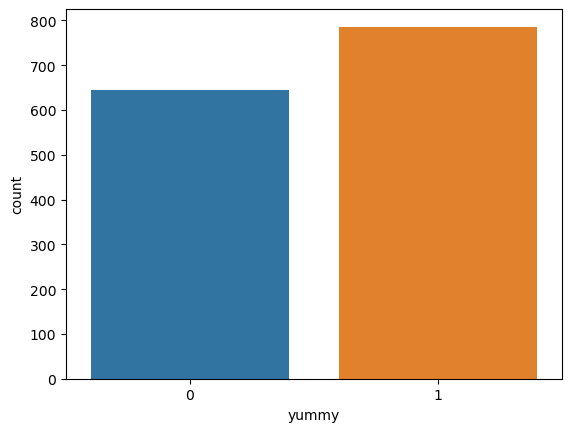

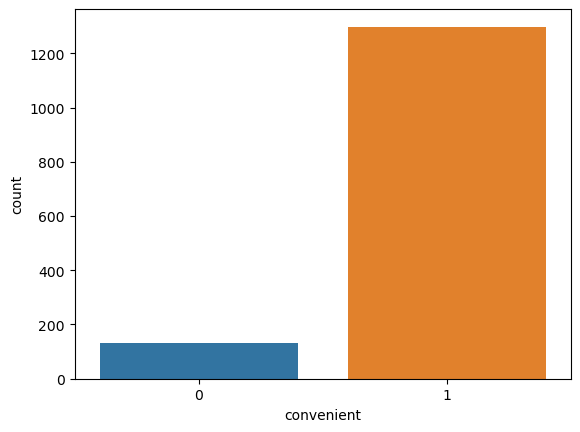

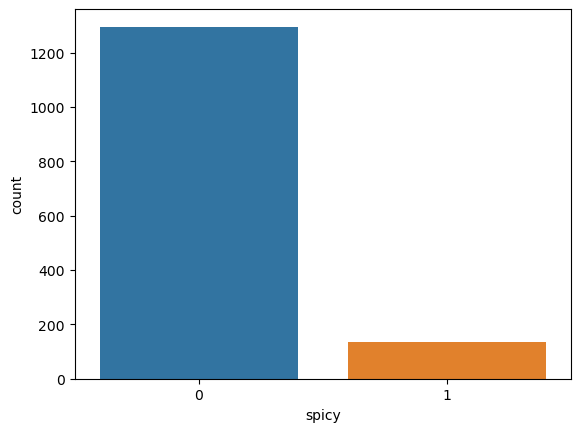

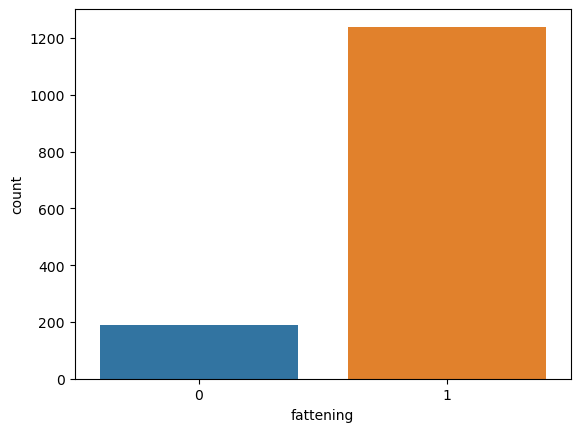

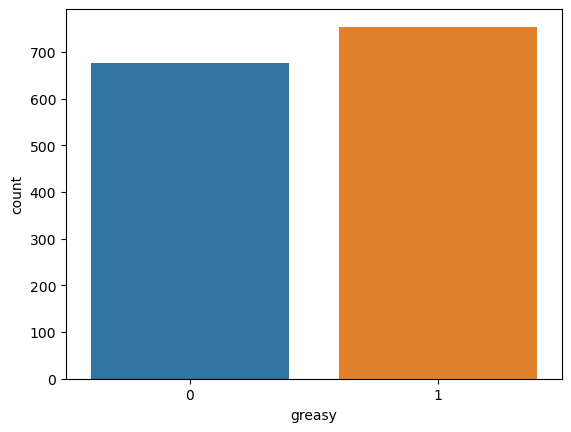

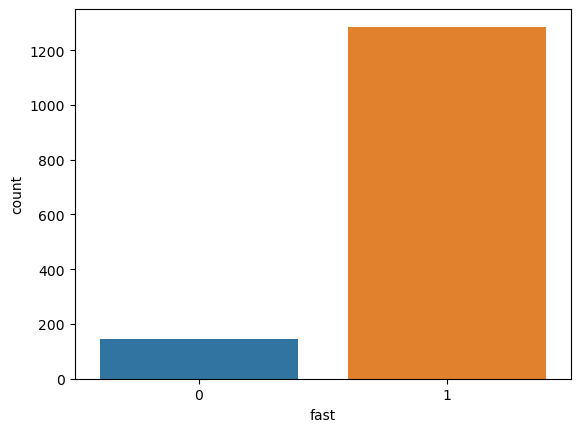

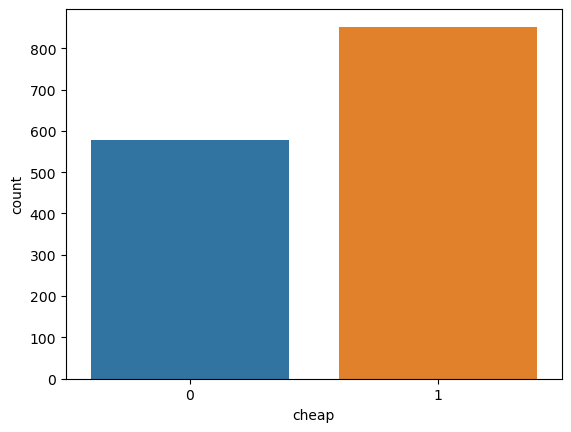

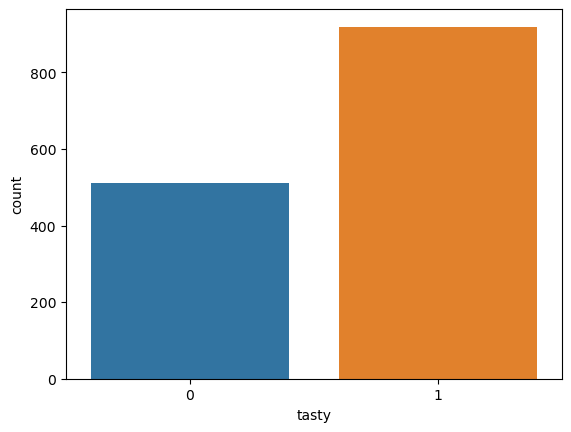

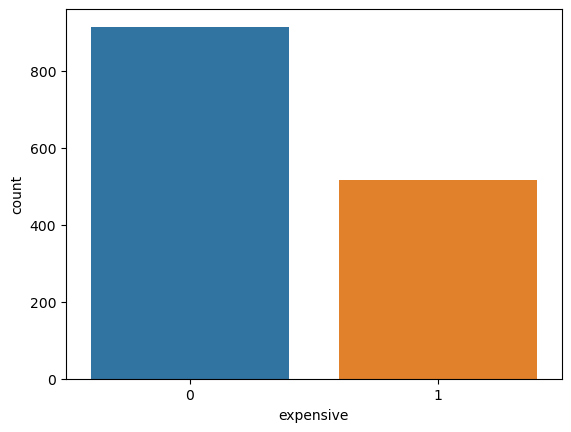

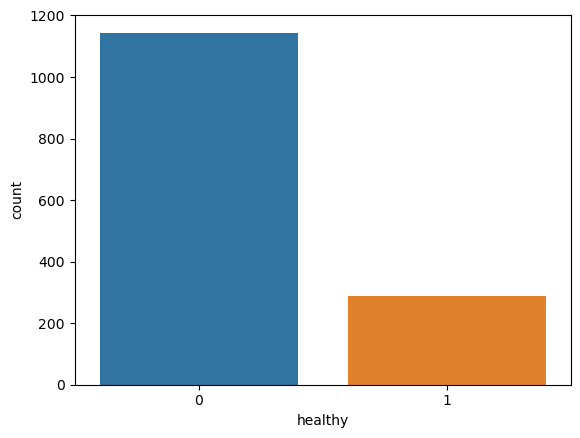

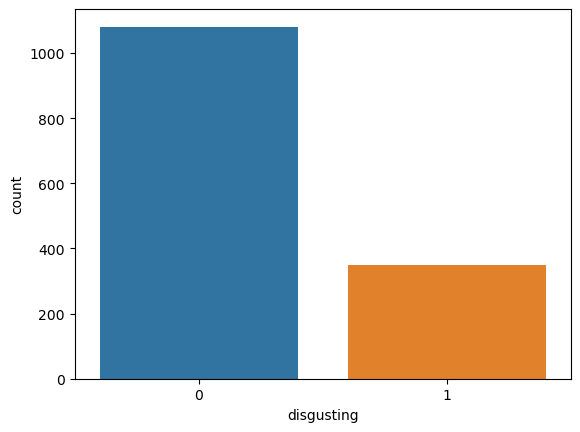

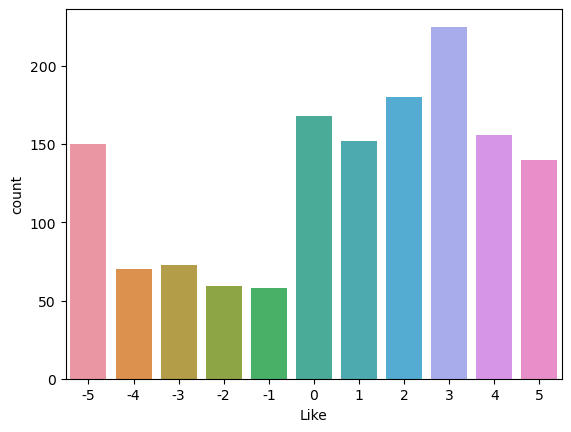

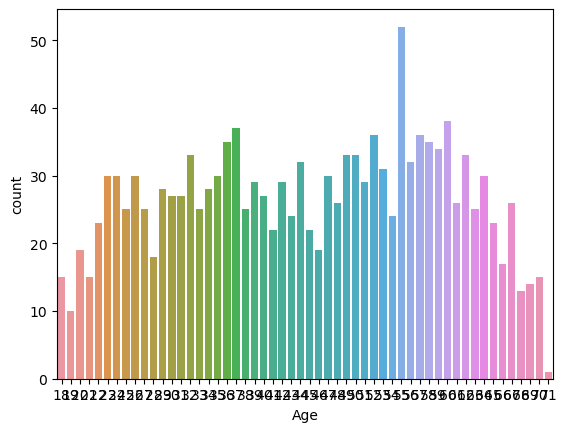

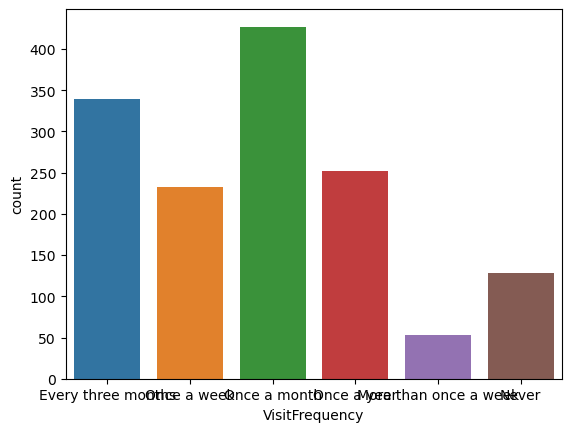

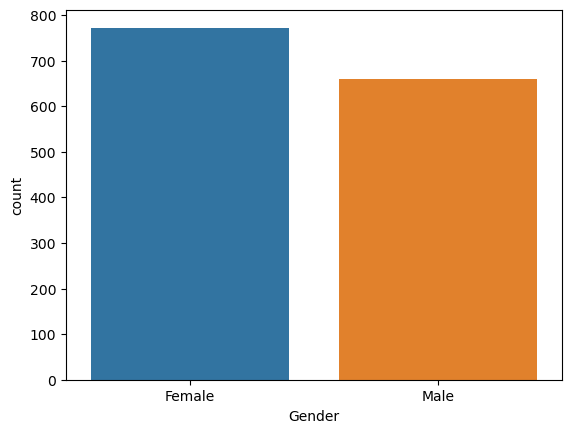

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distributions of numerical features
for column in df:
    sns.countplot(df, x=column)
    plt.show()

# Step 4: Data Preprocessing

In [12]:
df = df.drop(columns = ['VisitFrequency','Gender'], axis = 1)

In [13]:
from sklearn.preprocessing import StandardScaler

# Selecting numerical features for clustering
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numerical_features])

# Create a DataFrame with the scaled data
df_scaled = pd.DataFrame(df_scaled, columns=numerical_features)
df_scaled

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age
0,-1.103904,0.320102,-0.324067,0.392469,-1.055337,0.335787,0.824365,-1.339747,1.331637,-0.500873,-0.569012,-1.206517,1.151424
1,0.905876,0.320102,-0.324067,0.392469,0.947564,0.335787,0.824365,0.746410,1.331637,-0.500873,-0.569012,0.398359,0.446923
2,-1.103904,0.320102,3.085783,0.392469,0.947564,0.335787,-1.213055,0.746410,1.331637,1.996513,-0.569012,0.077384,1.221874
3,0.905876,0.320102,-0.324067,0.392469,0.947564,0.335787,0.824365,0.746410,-0.750956,-0.500873,1.757433,1.040309,1.715025
4,-1.103904,0.320102,-0.324067,0.392469,0.947564,0.335787,0.824365,-1.339747,-0.750956,1.996513,-0.569012,0.398359,0.306022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1426,-1.103904,0.320102,-0.324067,0.392469,0.947564,-2.978081,-1.213055,-1.339747,1.331637,-0.500873,1.757433,-1.848467,0.165122
1427,0.905876,0.320102,-0.324067,0.392469,-1.055337,-2.978081,0.824365,0.746410,-0.750956,1.996513,-0.569012,0.398359,-0.609829
1428,0.905876,0.320102,-0.324067,0.392469,-1.055337,0.335787,-1.213055,0.746410,1.331637,-0.500873,-0.569012,0.719334,0.517373
1429,0.905876,0.320102,-0.324067,-2.547969,-1.055337,0.335787,0.824365,0.746410,-0.750956,1.996513,-0.569012,1.040309,-0.257579


# Step 5: Determining the Optimal Number of Clusters

### K-Means Clustering Algorithm

In [14]:
samples = df_scaled.values

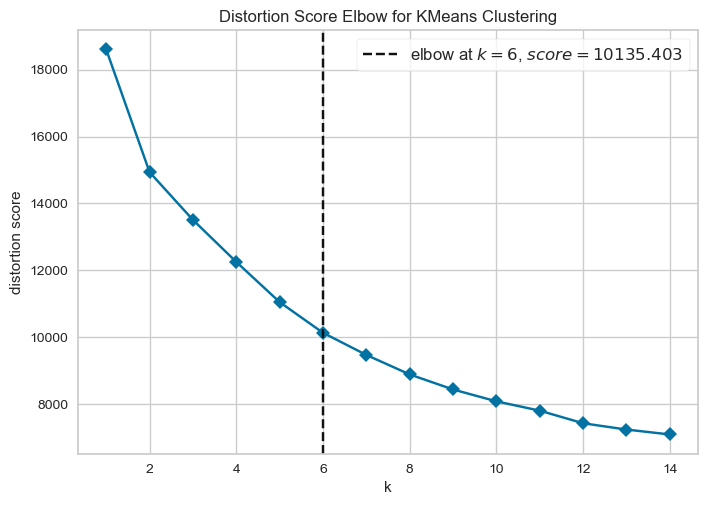

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [15]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(1,15),timings=False)
visualizer.fit(samples)        # Fit the data to the visualizer
visualizer.show()

In [16]:
#create model
kmeans = KMeans(n_clusters=6)
df['K_cluster'] = kmeans.fit_predict(df_scaled)
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,K_cluster
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,3
1,1,1,0,1,1,1,1,1,1,0,0,2,51,0
2,0,1,1,1,1,1,0,1,1,1,0,1,62,0
3,1,1,0,1,1,1,1,1,0,0,1,4,69,4
4,0,1,0,1,1,1,1,0,0,1,0,2,49,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,2
1449,1,1,0,1,0,0,1,1,0,1,0,2,36,4
1450,1,1,0,1,0,1,0,1,1,0,0,3,52,0
1451,1,1,0,0,0,1,1,1,0,1,0,4,41,1


In [17]:
kmeans.cluster_centers_

array([[ 7.24542120e-01,  2.29467704e-01,  1.50235644e-01,
         3.59306595e-01,  2.32242216e-01,  2.43330019e-02,
        -9.52632966e-01,  6.36611901e-01,  1.13590417e+00,
        -1.26625657e-02, -2.97884639e-01,  5.37126593e-01,
        -4.79787916e-01],
       [ 4.22039739e-01,  1.50022772e-01,  1.17950792e-01,
        -2.54796911e+00, -9.19337927e-01,  1.31226994e-01,
         1.95531568e-01,  4.24471874e-01, -3.26723932e-01,
         1.08697082e+00, -5.11568589e-01,  6.67819772e-01,
         3.89953694e-01],
       [-9.53439469e-01,  3.20102064e-01,  2.23885422e-02,
         2.98123814e-01,  3.37054106e-01, -4.61668041e-01,
        -1.08231154e+00, -9.26978000e-01,  1.07548881e+00,
        -3.80678315e-01,  7.87044426e-01, -8.66660686e-01,
         2.56292863e-01],
       [-1.04522457e+00,  3.20102064e-01, -2.53938149e-02,
         3.38811798e-01,  2.53127531e-01,  2.51125870e-01,
         6.83083940e-01, -8.37242080e-01, -7.20552870e-01,
        -3.45926056e-01,  2.20621074e

In [28]:
pd.DataFrame(kmeans.cluster_centers_, columns=['yummy','convenient','spicy','fattening','greasy','fast','cheap','tasty','expensive','healthy','disgusting','Like','Age'])

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age
0,0.724542,0.229468,0.150236,0.359307,0.232242,0.024333,-0.952633,0.636612,1.135904,-0.012663,-0.297885,0.537127,-0.479788
1,0.422040,0.150023,0.117951,-2.547969,-0.919338,0.131227,0.195532,0.424472,-0.326724,1.086971,-0.511569,0.667820,0.389954
2,-0.953439,0.320102,0.022389,0.298124,0.337054,-0.461668,-1.082312,-0.926978,1.075489,-0.380678,0.787044,-0.866661,0.256293
3,-1.045225,0.320102,-0.025394,0.338812,0.253128,0.251126,0.683084,-0.837242,-0.720553,-0.345926,0.220621,-0.691082,0.343047
4,0.751637,0.272045,-0.102030,0.392469,-0.216913,0.212480,0.686957,0.693043,-0.736426,0.079914,-0.455395,0.619309,-0.263313
5,-1.068015,-3.124004,-0.110951,-0.001339,0.428956,-0.906914,-0.521788,-1.190736,0.569259,-0.367085,1.341997,-1.481638,0.319232


In [18]:
df['K_cluster'].value_counts()

K_cluster
4    430
3    274
0    266
2    187
1    162
5    112
Name: count, dtype: int64

<Axes: xlabel='PCA1', ylabel='PCA2'>

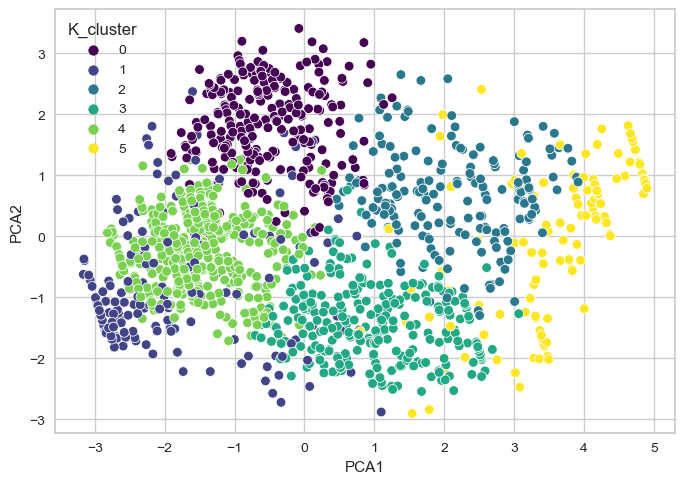

In [19]:
from sklearn.decomposition import PCA

# Use PCA for 2D visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df['PCA1'] = df_pca[:, 0]
df['PCA2'] = df_pca[:, 1]

# Scatter plot of clusters
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='K_cluster', palette='viridis')